In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv("Ultimate_AAPL_filtered.csv")    #read file.


#feature selection 
X=df[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]#repeat for other columns

y = df['Close_price-2days']

X




comment_num  retweet_num  like_num  follower_count  compound_score  \
0                 0            0         0            1161          0.5562   
1                 0            0         1             218          0.2500   
2                 0            0         1            1099          0.0000   
3                 0            0         0            1070         -0.1027   
4                 1            3         6          259879          0.0000   
...             ...          ...       ...             ...             ...   
528922            2            0         0            2924          0.2023   
528923            1            0         3            8340         -0.1656   
528924            2            0         3            7914          0.4215   
528925            1            0         1            6262          0.0258   
528926            1            0         1            7400          0.5267   

        Close_price-today  Close_price-tmr  
0               26.562500        26.565001  
1               26.562500        26.565001  
2               26.562500        26.565001  
3               26.562500        26.565001  
4               26.562500        26.565001  
...                   ...              ...  
528922          69.934998        70.004997  
528923          69.934998        70.004997  
528924          69.934998        70.004997  
528925          69.934998        70.004997  
528926          69.934998        70.004997  

[528927 rows x 7 columns]

In [56]:
#feature visualization
#histogram and cdf for today, tomorrow, 2 days with appropriate bin size


In [57]:
#feature normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)




In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statistics import mean

#sample code
lin_reg = LinearRegression()
np.random.seed(40)  # to make this code example reproducible


#kfold = KFold(n_splits=3, shuffle=True, random_state=42) #--->here k=3 with 3-fold cross validation.
#random_state controls randomness of each fold.
scores = []
"""
for k in range(3, 6):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42) #--->here k=3,4,5 with k-fold cross validation.
    for i, (train, test) in enumerate(kfold.split(X_scaled, y)):#--->splitting into train and test set.
        lin_reg.fit(X_scaled[train], y[train])
        #Y_pred = regression.predict(X[test])
        temp_score = lin_reg.score(X_scaled[test], y[test])
        scores.append(temp_score)
    print("For k =", k, " list of results:")
    print(scores)
    print("For k =", k, " the average result is", mean(scores))
    scores = []
    print(" ")
    print(" ")

#     print(i)
#     print(train)
#     print(test)
    
#Enter your code here. You can refer lab 1 and assignment 1 document for the implementation of
#fit and score.
"""

k = 3
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_scaled, y)):#--->splitting into train and test set.
    lin_reg.fit(X_scaled[train], y[train])
    #Y_pred = regression.predict(X[test])
    temp_score = lin_reg.score(X_scaled[test], y[test])
    scores.append(temp_score)
print("For k =", k, " list of results:")
print(scores)
print("For k =", k, " the average result is", mean(scores))
scores = []
print(" ")
print(" ")

For k = 3  list of results:
[0.9966467553995362, 0.9966367326962388, 0.9966024755872165]
For k = 3  the average result is 0.9966286545609971
 
 


In [61]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

gamma_reg = linear_model.GammaRegressor()

k = 3
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_scaled, y)):#--->splitting into train and test set.
    gamma_reg.fit(X_scaled[train], y[train])
    #Y_pred = regression.predict(X[test])
    temp_score = gamma_reg.score(X_scaled[test], y[test])
    scores.append(temp_score)
print("For k =", k, " list of results:")
print(scores)
print("For k =", k, " the average result is", mean(scores))
scores = []
print(" ")
print(" ")

For k = 3  list of results:
[0.17213198643982075, 0.17224963044466368, 0.1727379687464038]
For k = 3  the average result is 0.17237319521029607
 
 


In [62]:
k = 3
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
#bayes_reg = linear_model.BayesianRidge()
scores=[]
#lin_reg = LinearRegression()
for i, (train, test) in enumerate(kfold.split(X_scaled, y)):#--->splitting into train and test set.
    #bayes_reg.fit(X_scaled[train], y[train])
    #Y_pred = regression.predict(X[test])
    temp_score = lin_reg.score(X_scaled[test], y[test])
    scores.append(temp_score)
print("For k =", k, " list of results:")
print(scores)
print("For k =", k, " the average result is", mean(scores))
scores = []
print(" ")
print(" ")




For k = 3  list of results:
[0.9966468458423692, 0.9966368455058818, 0.9966024755872165]
For k = 3  the average result is 0.9966287223118225
 
 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

"""
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

"""

#####

X_train, X_test,
y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)


# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )


regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])


# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

filepaths = [
    "Ultimate_AAPL_filtered.csv",
    "Ultimate_TSLA_filtered.csv",
    "Ultimate_MSFT_filtered.csv",
    "Ultimate_GOOG_filtered.csv",
    "Ultimate_AMZN_filtered.csv",
]

scaler = MinMaxScaler()
lin_reg = LinearRegression()

# Train the model using the first four datasets
X_train_list = []
y_train_list = []

for filepath in filepaths[:-1]:
    df = pd.read_csv(filepath)

    X = df[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
    y = df['Close_price-2days']

    X_scaled = scaler.fit_transform(X)
    X_train_list.append(X_scaled)
    y_train_list.append(y.values)

X_train = np.vstack(X_train_list)
y_train = np.concatenate(y_train_list)


lin_reg.fit(X_train, y_train)

# Test the model on the fifth dataset
df_test = pd.read_csv(filepaths[-1])

X_test = df_test[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
y_test = df_test['Close_price-2days']

X_test_scaled = scaler.transform(X_test)

test_score = lin_reg.score(X_test_scaled, y_test)

print("Test score on the fifth dataset:", test_score)

Test score on the fifth dataset: 0.6344784793179836


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

filepaths = [
    "Ultimate_AAPL_filtered.csv",
    "Ultimate_TSLA_filtered.csv",
    "Ultimate_MSFT_filtered.csv",
    "Ultimate_GOOG_filtered.csv",
    "Ultimate_AMZN_filtered.csv",
]

scaler = MinMaxScaler()
#lin_reg = LinearRegression()
gamma_reg = linear_model.GammaRegressor()

# Train the model using the first four datasets
X_train_list = []
y_train_list = []

for filepath in filepaths[:-1]:
    df = pd.read_csv(filepath)

    X = df[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
    y = df['Close_price-2days']

    X_scaled = scaler.fit_transform(X)
    X_train_list.append(X_scaled)
    y_train_list.append(y.values)

X_train = np.vstack(X_train_list)
y_train = np.concatenate(y_train_list)


gamma_reg.fit(X_train, y_train)

# Test the model on the fifth dataset
df_test = pd.read_csv(filepaths[-1])


X_test = df_test[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
y_test = df_test['Close_price-2days']

X_test_scaled = scaler.transform(X_test)

test_score = gamma_reg.score(X_test_scaled, y_test)

print("Test score on the fifth dataset:", test_score)


Test score on the fifth dataset: -0.8448080341597244


In [3]:
df = pd.read_csv("Ultimate_AAPL_filtered.csv")
stock = df
df.head()

post_date  comment_num  retweet_num  like_num  follower_count  \
0  2015-01-04 21:04:38            0            0         0            1161   
1  2015-01-04 21:07:58            0            0         1             218   
2  2015-01-04 21:08:09            0            0         1            1099   
3  2015-01-04 21:10:46            0            0         0            1070   
4  2015-01-04 21:13:34            1            3         6          259879   

   compound_score  Close_price-today  Close_price-tmr  Close_price-2days  
0          0.5562            26.5625        26.565001            26.9375  
1          0.2500            26.5625        26.565001            26.9375  
2          0.0000            26.5625        26.565001            26.9375  
3         -0.1027            26.5625        26.565001            26.9375  
4          0.0000            26.5625        26.565001            26.9375

In [4]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])



In [10]:
number_simulation = 100
predict_day = 30
returns = df['Close_price-today'].pct_change()
volatility = returns.std()
results = pd.DataFrame()

for i in range(number_simulation):
    prices = []
    prices.append(df['Close_price-today'].iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, volatility)))
    results[i] = pd.Series(prices).values

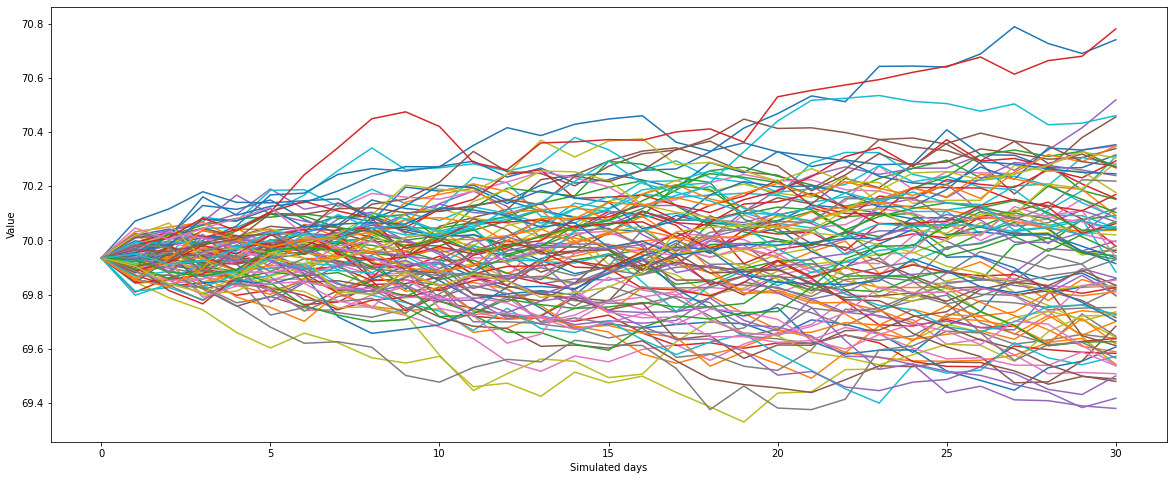

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

In [48]:
results[1]

0     69.934998
1     69.930348
2     69.966169
3     69.977830
4     70.045015
5     69.979279
6     70.059316
7     70.011477
8     69.966547
9     69.935366
10    69.971281
11    69.959778
12    69.965077
13    69.965441
14    69.951841
15    69.983815
16    69.969492
17    69.961834
18    70.017344
19    69.957074
20    69.905505
21    69.957865
22    69.997464
23    69.877056
24    69.911907
25    69.878353
26    69.920600
27    69.853820
28    69.777706
29    69.855455
30    69.819010
Name: 1, dtype: float64

In [21]:
df = pd.read_csv("Ultimate_AAPL_filtered.csv")
df['change_in_price'] = (df['Close_price-2days'] - df['Close_price-tmr'])
df.head()

post_date  comment_num  retweet_num  like_num  follower_count  \
0  2015-01-04 21:04:38            0            0         0            1161   
1  2015-01-04 21:07:58            0            0         1             218   
2  2015-01-04 21:08:09            0            0         1            1099   
3  2015-01-04 21:10:46            0            0         0            1070   
4  2015-01-04 21:13:34            1            3         6          259879   

   compound_score  Close_price-today  Close_price-tmr  Close_price-2days  \
0          0.5562            26.5625        26.565001            26.9375   
1          0.2500            26.5625        26.565001            26.9375   
2          0.0000            26.5625        26.565001            26.9375   
3         -0.1027            26.5625        26.565001            26.9375   
4          0.0000            26.5625        26.565001            26.9375   

   change_in_price  
0         0.372499  
1         0.372499  
2         0.372499  
3         0.372499  
4         0.372499

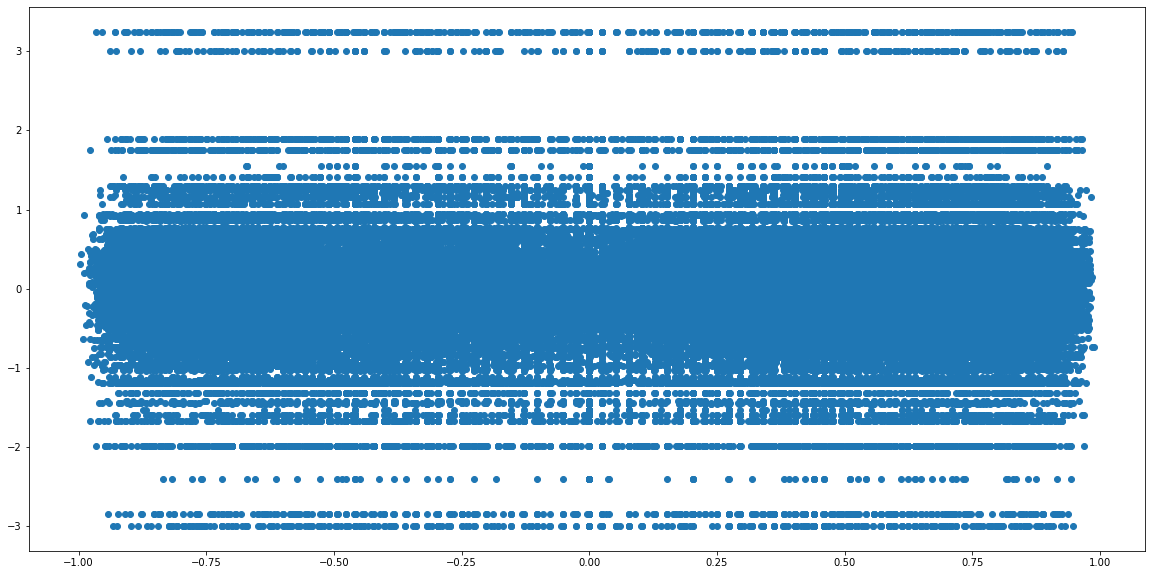

In [53]:
import matplotlib.pyplot as plt

X = df["compound_score"]
Y = df["change_in_price"]

plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.show()


In [10]:
from scipy.stats import pearsonr

df = pd.read_csv("Ultimate_TSLA_filtered.csv")
df['change_in_price'] = (df['Close_price-2days'] - df['Close_price-tmr'])

X = df["compound_score"]
Y = df["change_in_price"]

corr = pearsonr(X, Y)[0]
print(corr)

0.002306914745188826


In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv("Ultimate_TSLA_filtered.csv")

X = df["Close_price-today"]
Y = df["Close_price-tmr"]

plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.show()

In [12]:
from scipy.stats import pearsonr

df = pd.read_csv("Ultimate_TSLA_filtered.csv")
df['change_in_price'] = (df['Close_price-2days'] - df['Close_price-tmr'])

X = df["Close_price-today"]
Y = df["Close_price-tmr"]

corr = pearsonr(X, Y)[0]
print(corr)

0.9844606694813249


In [ ]:
#Calculating Pearson correlation
df = pd.read_csv("Ultimate_TSLA_filtered.csv")
df['change_in_price'] = (df['Close_price-2days'] - df['Close_price-tmr'])

X = df["compound_score"]
Y = df["change_in_price"]



In [32]:

df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df2 = pd.read_csv('Ultimate_AMZN_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')
df4 = pd.read_csv('Ultimate_MSFT_filtered.csv')

# combine all companies' data
df = pd.DataFrame()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df= df.drop(columns=['post_date','post_date_date'])
df['Increase'] = (df['Close_price-2days'] > df['Close_price-tmr'])
X=df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df['Increase']

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X, Y)

LinearDiscriminantAnalysis()

In [35]:
df5 = pd.read_csv('Ultimate_TSLA_filtered.csv')
df5['Increase'] = (df5['Close_price-2days'] > df5['Close_price-tmr'])
X=df5[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df5['Increase']
LDA.score(X, Y)

0.4980019316672703

In [6]:
df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df2 = pd.read_csv('Ultimate_AMZN_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')
df4 = pd.read_csv('Ultimate_MSFT_filtered.csv')

# combine all companies' data
df = pd.DataFrame()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df= df.drop(columns=['post_date','post_date_date'])
df['Increase'] = (df['Close_price-2days'] > df['Close_price-tmr'])
X=df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df['Increase']



In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X, Y)

QuadraticDiscriminantAnalysis()

In [38]:
df5 = pd.read_csv('Ultimate_TSLA_filtered.csv')
df5['Increase'] = (df5['Close_price-2days'] > df5['Close_price-tmr'])
X=df5[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df5['Increase']
QDA.score(X, Y)


0.5092025836049741